<table>
    <tr>
        <td><img src="https://s3.amazonaws.com/media-p.slid.es/uploads/1485763/images/9060062/Header.png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">    <FONT COLOR="blue">  Algoritmo de Naive-Bayes         </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">PLN </p></tp>
            <tp><p style="font-size:115%;text-align:center">Pregrado MACC 2023-2</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Fabián Sánchez</p></tp>
        </td>
    </tr>
</table>

# <FONT SIZE=5 COLOR="purple"> 1. Algoritmo Naive Bayes Supervisado en la clasificación de textos </FONT>

Los pasos que hay que realizar para poder utilizar el algoritmo Naive Bayes en problemas de clasificación de texos son los siguientes.

- Convertir el conjunto de datos en una tabla de frecuencias, es decir vectorizar.

- Crear una tabla de probabilidad calculando las correspondientes a que ocurran los diversos eventos.

- La ecuación Naive Bayes se usa para calcular la probabilidad posterior de cada clase.

- La clase con la probabilidad posterior más alta es el resultado de la predicción.

**Observaciones**

- Los puntos fuertes del algoritmos son:

   - Es un algoritmo sencillo de implementar para problemas de clasificación binarios y multiclase.

   - Si los casos en que se de la independencia en los $X_i$ el algoritmo tendrá un muy buen comportamiento de predección.

   - Dado que se mira cada variable de manera independiente con su determinada distribución, el algoritmo funciona bien para grandes cantidades de variables.

- Los puntos débiles principales son:

   - La suposión de independencia es muy fuerte y muchas veces no reflejará la realidad de los datos.

   - Cuidado: cuando el conjunto de datos de test tiene una característica que no está en el de entrenamiento, el modelo le asignará una probabilidad de cero. (revisar suavizado por estimación de Laplace)




# <FONT SIZE=5 COLOR="purple"> 2. Explicación Matemática del Modelo </FONT>

El teorema de Bayes, indica lo siguiente

$$P(A | B ) = \dfrac{P(A \cap B)}{P(B)}$$

$$P(A | B ) = \dfrac{P(A)P(B | A)}{P(B)}$$

- $P(A|B)$: probabilidad de que ocurra A dado que B ha ocurrido

- $P(B|A)$: probabilidad de que ocurra B dado que A ha ocurrido

- $P(A)$: probabilidad de que ocurra A.

- $P(B)$: probabilidad de que ocurra B.

La fórmula se puede generalizar a más eventos de la siguiente manera:

Sean $B_1,B_2, \dots B_n$ n-eventos, luego si $B=B_1 \cap B_2 \cap \dots \cap B_n$

$$P(A | B_1 \cap B_2 \cap \dots \cap B_n) = \dfrac{P(A \cap B_1 \cap B_2 \cap \dots \cap B_n)}{P(B_1 \cap B_2 \cap \dots \cap B_n)}$$

Si aplicamos el teorema de Bayes

$$P(A | B_1 \cap B_2 \cap \dots \cap B_n) = \dfrac{P(A)P(B_1 \cap B_2 \cap \dots \cap B_n | A)}{P(B_1 \cap B_2 \cap \dots \cap B_n)}$$

Esto nos lleva a la regla de la cadena para probabilidades.

$$ \small \begin{align} P(B1 \cap & B2 \cap... \cap Bn \cap A) =\\
& = P(B1 | B2 \cap B3 \cap ...\cap Bn \cap A).P(B2 \cap B3 \cap ...\cap Bn \cap A) = \\
& = P(B_1 | A). P(B2 \cap B3 \cap ...\cap Bn \cap A) = \\
& = P(B_1 | A). P(B2 | B3\cap B4 \cap ...\cap Bn \cap A).P(B3 \cap B4 \cap ...\cap Bn \cap A) = \\
& = P(B_1 | A).P(B_2 | A).P(B3 \cap B4 \cap ...\cap Bn \cap A) \\  . \\  .\\ . \\
& = P(B_1 | A).P(B_2 | A) \dots P(B_n | A) P(A) \end{align} $$

En este punto es importante resaltar que se supone que los $B_i$ son independientes dos a dos. Es decir, la probabilidad de ocurrencia de un evento $B_j$ no afecta la probabilidad de ocurrencia de otro evento $B_i$. Por esta razón al algoritmo se le denomina el algoritmo ***ingenuo*** o ***Naive***, en inglés.

$$P(B_i|B_j) = P(B_i)$$

Coloquemos esta situación en un problema con datos y variables

<center>
<table class="default">
 <tr>
    <td>$Y$</td>
    <td>$X_1$</td>
    <td>$X_2$</td>
    <td>$X_3$</td>
    <td>$\dots$</td>
    <td>$X_n$</td>
    
  </tr>
  <tr>
    <td>-- </td>
    <td>--</td>
    <td>-- </td>
    <td>-- </td>
    <td>-- </td>
    <td>-- </td>
  </tr>

</tr>
  <tr>
    <td>-- </td>
    <td>--</td>
    <td>-- </td>
    <td>-- </td>
    <td>-- </td>
    <td>-- </td>
  </tr>

</tr>
  <tr>
    <td>-- </td>
    <td>--</td>
    <td>-- </td>
    <td>-- </td>
    <td>-- </td>
    <td>-- </td>
  </tr>

</table>
</center>

Si suponemos que $Y$ es la variable de respuesta con clases $\{y_i\}_{i=1}^m$ y $X_i$ son los predictores, que para este algoritmos suponemos que independientes. Podemos calcular

$$  P(Y=y_j | X_1=x_1 \cap X_2=x_2 \cap \dots \cap X_n=x_n)= \dfrac{{\Large\Pi}_{k=1}^n P(X_k=x_k | Y=y_j)P(Y=y_j)}{P(X_1=x_1 \cap X_2=x_2 \cap \dots \cap X_n=x_n)} $$

Finalmente, como el denominador no depende de la clase $y_j$ ni de los índices $k$, el clasificador ***Naive-Bayes*** es:

$$ \begin{align} classifier&(x_1, x_2, x_3, \dots x_n) = \\
\\ & = argmax_{y_j} \left [ P(Y=y_j) {\Large\Pi}_{k=1}^n P(X_k = x_k | Y=y_j) \right ]
\end{align}$$


<FONT SIZE=5 COLOR="red"> Observaciones </FONT>

Recordemos que:

$$P(Y | X_j) = \dfrac{P(Y \cap X_j) }{P(X_j)}$$

- Note que estas probabilidades se pueden obtener del conjunto mediante las frecuencias relativas y la definición de probabilidad clásica de Laplace

$$P(A)= \dfrac{\text{casos favorables}}{\text{casos posibles}}$$

- Tenemos que suponer hipótesis sobre las distribuciones. En general.

   - Para el caso discreto, es decir, que la variable es discreta con dos categorías: **Bernoulli**. (éxito o fracaso)

   $$P(Y=y_i)= p^x(1-p)^{1-x}$$

   $$ Y \sim  Bernoulli(p)$$

   - Análogamente, para el caso discreto con varias categorias: **multinomial**.

   - Para el caso continuo se supone una **distribución normal**

En este caso, suponemos que $Y$ tiene determinadas clases, es decir, las categorías, y con base a eso calculamos la media y la varianza de cada clase.

Sea $\mu_c$ la media de $X_i$ asociada a la clase $c$ y

Sea $\sigma_c^2$ la varianza de $X_i$ asociada a la clase $c$.

De esta manera

$$P(X_i = x | y=c) = \dfrac{1}{\sqrt{2\pi \sigma_c^2}}{\LARGE e}^{-\dfrac{(x-\mu_c)^2}{2 \sigma_c^2}} $$







## Vamos a hacer dos ejemplos uno continuo y otro discreto


## <FONT SIZE=4 COLOR="red"> Ejemplo caso continuo </FONT>

Vamos a considerar los datos que están en el siguiente link.

In [ ]:
import pandas as pd
url="https://raw.githubusercontent.com/Fabian830348/Bases_Datos/master/bayes1.csv"
datos=pd.read_csv(url, sep = ";")
datos

,sexo,altura (cm),peso (lbs),talla del pie (cm)
0,hombre,"182,88",180,"30,48"
1,hombre,"180,44",190,"27,94"
2,hombre,"170,08",170,"30,48"
3,hombre,"180,44",165,"25,4"
4,mujer,"152,40",100,"15,24"
5,mujer,"167,64",150,"20,32"
6,mujer,"165,20",130,"17,78"
7,mujer,"175,26",150,"22,86"


El ejercicio consiste en clasificar la siguiente terna, en hombre o mujer.

$(X_1,X_2,X_3)=(altura, peso, talla/pie)=(182.88, 130, 20.32)$

Para ello, siga los siguientes pasos:


1. Calcule la media y varianza de cada uno de las variables en cada uno de los grupos. En otras palabras, llene la siguiente tabla.
$$ $$
<center>
<table class="default">
<tr>
 <td></td>
 <td>$\Large \mu_{altura}$</td>
 <td>$\Large\mu_{peso}$</td>
 <td>$\Large\mu_{talla}$</td>
 <td>$\Large\sigma^2_{altura}$</td>
 <td>$\Large\sigma^2_{peso}$</td>
 <td>$\Large\sigma^2_{talla}$</td>
</tr>
<tr>
 <td>MUJER </td>
 <td>--</td>
 <td>--</td>
 <td>--</td>
 <td>--</td>
 <td>--</td>
 <td>--</td>
</tr>
<tr>
 <td>HOMBRE</td>
 <td>--</td>
 <td>--</td>
 <td>--</td>
 <td>--</td>
 <td>--</td>
 <td>--</td>
</tr>
</table>
</center>



2. A partir de esta tabla calcular para la categoria hombre y mujer

- Media y la varianza de cada uno de los $X_i$.

$$P(X_i = x | c) = \dfrac{1}{\sqrt{2\pi \sigma_c^2}}{\LARGE e}^{-\dfrac{(x-\mu_c)^2}{2 \sigma_c^2}} $$

Por ejemplo,

- $P(altura = 182.88 | hombre) = \dfrac{1}{\sqrt{2\pi \sigma_c^2}}{\LARGE e}^{-\dfrac{(x-\mu_c)^2}{2 \sigma_c^2}} = \dfrac{1}{\sqrt{2\pi (32.53)^2}}{\LARGE e}^{-\dfrac{(182.88-178.4)^2}{2 (32.53)^2}} ≈ $

Continuar con los cálculos para

- $P(peso = 130 | hombre) = $

- $P(talla/pie = 20.32 | hombre) =$






3. Repita el ejercicio para la categoría ***mujer***

Luego de tener estos cálculos

$$ P(Y = hombre | altura = 182.88 \cap peso = 130 \cap talla = 20.32) = \dfrac{P(hombre)P(altura = 182.88| hombre)P(peso = 130| hombre)P(talla/pie
 = 20.32 | hombre)}{P(altura = 182.88 \cap peso =130 \cap talla/pie = 20.32)}$$

- Hacer lo mismo para mujer

- Determinar cuál es el máximo.

El siguiente ejercicio, se deja al lector para la casa.

## <FONT SIZE=4 COLOR="red"> Ejemplo caso discreto </FONT>

Suponga que tiene los siguientes cinco textos clasificados cada uno por curso: "ML" o "PLN".

- Texto 1 (ML) : {"carlos", "carlos", "carlos" , "carlos" , "matriz"}

- Texto 2 (ML) : {"carlos", "pedro", "pedro" , "fabian"}

- Texto 3 (ML) : {"pedro", "pedro", "pedro" , "carlos" , "fabian", "hugo" , "matriz"}

- Texto 4 (PLN) : {"fabian", "fabian", "fabian" , "hugo" , "matriz", "carlos"}

- Texto 5 (PLN) : {"fabian", "fabian", "hugo" , "hugo" , "hugo" , "pedro" , "matriz"}

A partir de lo anterior responder

   - Número de textos =

   - Número de textos (ML)=

   - Número de textos (PLN) =

   - $P(ML)= $

   - $P(PLN)= $

   - Número total de palabras =

   - Número de palabras ML =

   - Número de palabras PLN =

Clasificar : $Nuevo=(``carlos", ``carlos", ``fabian", ``matriz")$

- $P(ML | Nuevo) = $

- $P(PLN| Nuevo) = $

Recuerde que:

$$P(palabra | etiqueta) = \dfrac{\# \, palabras \, con  \, esa \, etiqueta}{\# \, de \,  apariciones \, con \,  esa \, etiqueta}$$




# <FONT SIZE=5 COLOR="purple"> 3. Pasos para implementar un modelo de clasificación de texto </FONT>

Los siguiente pasos describen de manera general el proceso que se debe realizar para aplicar un modelo de clasificación a un conjunto cuyas variables con cadenas de texto, como es el caso de los problemas de procesamiento de lenguaje natural.

- Explorar y entender de los datos.

- Procesar los datos

- Dividir el conjunto de datos en entrenamiento y prueba

- Aplicar “Bag of Words” (BoW). Puede ser con vectores de frecuencia o **TF+iDF**

- Implementar el algoritmos de Naive Bayes con *Scikit Learn*

- Evaluar el modelo. Por ejemplo, usando la matriz de confusión y las métricas adecuadas.

- Concluir

Para ilustrar los pasos anteriores con un ejemplo, comenzaremos importando las siguientes librerías

In [ ]:
# manipulación de data.frames
import pandas as pd
import numpy as np

# Para gráficas
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
import seaborn as sns
import plotly.express as px

# Para descomponer en entrenamiento y prueba
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Para implementar Naive Bayes en clases discretas.
from sklearn.naive_bayes import MultinomialNB

# Para métricas de evaluación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Para bolsas de palabras
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


También instalaremos *Spacy*.

In [ ]:
pip install spacy

In [ ]:
!python -m spacy download en_core_web_sm

2023-08-25 16:13:01.337753: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-25 16:13:04.026378: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 28.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
from spacy.pipeline import Sentencizer
from collections import Counter

## <FONT SIZE=4 COLOR="bronw"> 3.1 Importar los datos desde  el GitHub </FONT>

- Para este ejemplo usaremos un conjunto de datos del repositorio ***Machine Learning UCI***.
[Datos Spam 📩](https://archive.ics.uci.edu/ml/machine-learning-databases/00228/)

- Ver documentación para ampliar información de la base

In [ ]:
import io
import requests

url="https://raw.githubusercontent.com/Fabian830348/Bases_Datos/master/SMSSpamCollection"
datos = pd.read_csv(url, delimiter = "\t",header=None)

## <FONT SIZE=4 COLOR="bronw"> 3.2 Rápida exploración de los datos </FONT>

In [ ]:
# primeros registros del conjunto
datos.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# cuál es el tamaño de los datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5572 non-null   object
 1   1       5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
# contar los correos spam y los ham
datos[0].value_counts()

ham     4825
spam     747
Name: 0, dtype: int64

In [ ]:
# gráfica con plotly express
px.bar(datos[0].value_counts(),)

## <FONT SIZE=4 COLOR="bronw"> 3.3 Preprocesamiento de los datos </FONT>

Convertir las variables de etiqueta en valores codificados numéricos

In [ ]:
# Cambiar las etiquetas por valores codificados : ham = 0 y spam = 1
datos = pd.get_dummies(datos,columns=[0])

In [ ]:
datos.head()

,1,0_ham,0_spam
0,"Go until jurong point, crazy.. Available only ...",1,0
1,Ok lar... Joking wif u oni...,1,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,0,1
3,U dun say so early hor... U c already then say...,1,0
4,"Nah I don't think he goes to usf, he lives aro...",1,0


Por tratarse de correo Spam vamos a aplicar el método de clasificación sin hacer limpieza de los datos. Es decir, no vamos a preprocesarlos. Además, vamos a trabajar con los datos desbalanceados.

**Ejercicio para la casa** el procesamiento lo realizará como tarea y comparará los resultados.

## <FONT SIZE=4 COLOR="bronw"> 3.4 Dividir el conjunto en entrenamiento y prueba </FONT>

**Observación**: es mejor hacer este proceso antes de hacer la vectorización.

In [1]:
# Dividir los datos en conjunto de entrenamiento y de test
X_train, X_test, y_train, y_test = train_test_split(datos[1],
                                                    datos[['0_spam']],
                                                    random_state=1)
print('Número de filas total base: {}'.format(datos.shape[0]))
print('Número de filas conjunto de entrenamiento: {}'.format(X_train.shape[0]))
print('Número de filas conjunto de prueba: {}'.format(X_test.shape[0]))

NameError: ignored

## <FONT SIZE=4 COLOR="bronw"> 3.5 Bolsa de Palabras </FONT>

Ahora, vamos a usar el vectorizador por frecuencias de scikit

*from sklearn.feature_extraction.text import CountVectorizer*

*count_vector = CountVectorizer()*

Esta función hace los siguientes procesos.

- Tokeniza y hace las frecuencias.

- Convierte todo a minúscula

- Ignora signos de puntuación.

- Se puede indicar sin *stop_word* (en inglés funciona bien)



A continuación, se recuerda como el código para vectorizar

In [ ]:
# Usando scikit tenemos : sklearn.feature_extraction.text
from sklearn.feature_extraction.text import CountVectorizer
vectorizar = CountVectorizer()
vectores = vectorizar.fit_transform(documento)
print(vectorizar.get_feature_names_out())
print(vectores.toarray())

In [ ]:
# permite ver las diferentes palabras
vectorizar.fit(documento)
names = vectorizar.get_feature_names_out()
names

In [ ]:
# se presenta como un arreglo
doc_array = vectorizar.transform(documento).toarray()
doc_array

La otra forma de vectorizar es con ***TF+IDF***. Recordamos también el código.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=1)
# Pasamos a Bolsa de palabras
X = tfidf.fit_transform(corpus)
# Resultados
print(tfidf.get_feature_names_out ())
print(X.toarray())

En este punto decidimos cuál vectorizador aplicamos: frecuencias o **TF+iDF**.

1. Aplicamos la bolsa de palabras con *CounterVectorizer()*

- ***X_train*** lo pasamos por el counter.

- ***X_test*** lo pasamos por el counter


In [ ]:
# Para vectorizar por frecuencias
vectorizar = CountVectorizer()
# Para vectorizar por TF+iDF
tfidf = TfidfVectorizer(min_df=1)

Para este ejemplo que estamos desarrollando haremos el ejercicio con el primero. Luego, en clase el estudiante hará lo mismo con el segundo. (TF+iDF).

In [ ]:
# pasamos los datos de entrenamiento por el counter
X_train = vectorizar.fit_transform(X_train)
# pasamod los datos de prueba por el counter
X_test = vectorizar.transform(X_test)

## <FONT SIZE=4 COLOR="bronw"> 3.6 Aplicación del Algoritmo de Clasificación </FONT>

En este punto aplicamo el algoritmo de clasificación, que para nuestro caso es ***Naive-Bayes*** de Sci-Kit learn

- Para características discretas es mejor usar: **multinomial**

- Para datos continuos es mejor usar: **Gaussiano**

Como estamos trabajando una matriz de frecuencia, entonces se suguiere usar el primero. Sin embargo, es un hiperparámetro que se puede cambiar.

In [2]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

NameError: ignored

Para hacer predicciones sobre los datos de *prueba* usamos ***predict***

In [ ]:
prediccion = naive_bayes.predict(X_test)
prediccion

array([0, 0, 0, ..., 0, 1, 0], dtype=uint8)

## <FONT SIZE=4 COLOR="bronw"> 3.7 Evaluación del modelo de clasificación </FONT>

Recordemos que para evaluar un modelo de esta naturaleza usamos la matriz de confusión

### <FONT SIZE=4 COLOR="green"> Matriz de Confusión : Repaso </FONT>

En el campo del Machine Lerning aprendizaje una **matriz de confusión** es una herramienta que permite visualizar el desempeño de un algoritmo  de aprendizaje supervisado de clasificación.

- Cada columna de la matriz representa el número de predicciones de cada clase.

- Cada fila representa a las instancias en la clase real.

Esta matriz permite ver qué tipos de aciertos y errores está teniendo nuestro modelo a la hora de pasar por el proceso de aprendizaje con los datos.

En el siguiente gráfico se muestra lo anterior

<center><img src="https://github.com/Fabian830348/cursos/blob/master/Imagen/metricas.png?raw=true" alt="centered image" width="600" height="500"></center>

Para entender la matriz de confusión debemos definir dos conceptos:

**Exactitud:** Mide cuánto se aproximan los resultados al valor verdadero

**Precisión:** Mide cuánto se aproximan los datos entre sí.

Además,

**Verdadero positivo:** El valor real es positivo y la prueba predice tambien que es positivo.

- La persona estaba enferma y el modelo predice bien que estaba enferma. *Prediccón correcta*

**Verdadero negativo:** El valor real es negativo y la prueba predice tambien que el resultado es negativo.

- La persona no está enferma y el modelo predice que no está enferma. *Predicción correcta*

**Falso negativo:** El valor real es positivo, y la prueba predice que el resultado es negativo.

- La persona esta enferma y el modelo predice que no lo está. *predicción incorrecta* : error tipo II

**Falso positivo:** El valor real es negativo, y la prueba predice que el resultado es positivo.

- La persona no está enferma y el modelo predice que lo está. *predicción incorrecta* : error tipo I

Veamos las métricas que se utilizan para evaluar el modelo.

**Accuracy** : Exactitud

- La Exactitud (en inglés, “Accuracy”) se refiere a lo cerca que está el resultado de una medición del valor verdadero.

- Es el porcentaje de predicciones correctas de todo el modelo

- Es la proporción de resultados verdaderos (tanto verdaderos positivos (VP) como verdaderos negativos (VN)) dividido entre el número total de casos examinados (verdaderos positivos, falsos positivos, verdaderos negativos, falsos negativos)

$$Accurary = \dfrac{VP+VN}{VP+FN+VN+FP}$$

**Precision** : Precisión

- La Precisión (en inglés “Precision”)  se refiere a la dispersión del conjunto de valores obtenidos a partir de mediciones repetidas de una magnitud.

- A mayor precisión menos es la dispersión.

- Es la proprorción de verdaderos positivos dividido entre los resultados etiquetados como positivos.

- Es el porcentaje de casos reales positivos dentro de los casos positivos detectados.

$$Precision = \dfrac{VP}{VP+FP}$$

**Recall**:

Es la proporción de casos positivos que fueron correctamente identificadas por el algoritmo.

$$Recall = \dfrac{VP}{VP+FN}$$

*En el área de la salud se dice que la sensibilidad o recall es la capacidad de de poder detectar correctamente la enfermedad entre los enfermos*

**Especificidad o Especifity:** Es la proporción de casos negativos que fueron correctamente identificadas por el algoritmo.

$$Especifity = \dfrac{VN}{VN+FP}$$

*En el area de la salud se dice que la especificidad es  la capacidad de poder identificar los casos de pacientes sanos entre todos los sanos*

**F1 Score:** Esta una métrica muy empleada porque nos resume la precisión y sensibilidad en una sola expresión. Por ello es de gran utilidad cuando la distribución de las clases es desigual, por ejemplo cuando el número de pacientes con una condición es del 15% y el otro es 85%.

$$F1(score)= \dfrac{2*precision*recall}{precision+recall}$$

- **Alta precisión y alto recall**: el modelo de Machine Learning escogido maneja perfectamente esa clase.

- **Alta precisión y bajo recall**: el modelo de Machine Learning escogido no detecta la clase muy bien, pero cuando lo hace es altamente confiable.

- **Baja precisión y alto recall**: El modelo de Machine Learning escogido detecta bien la clase,  pero también incluye muestras de la otra clase.

- **Baja precisión y bajo recall**: El modelo de Machine Learning escogido no logra clasificar la clase correctamente.

Ahora, pasamos a evaluar nuestro modelo

In [ ]:
# para evaluar el modelo puedo importar las métricas
print('Accuracy score: ', format(accuracy_score(y_test, prediccion)))
print('Precision score: ', format(precision_score(y_test, prediccion)))
print('Recall score: ', format(recall_score(y_test, prediccion)))
print('F1 score: ', format(f1_score(y_test, prediccion)))

Accuracy score:  0.9885139985642498
Precision score:  0.9720670391061452
Recall score:  0.9405405405405406
F1 score:  0.9560439560439562


Ahora, graficamos la matriz de confusión

Text(0.5, 69.7222222222222, 'Valores de Predicción del modelo')

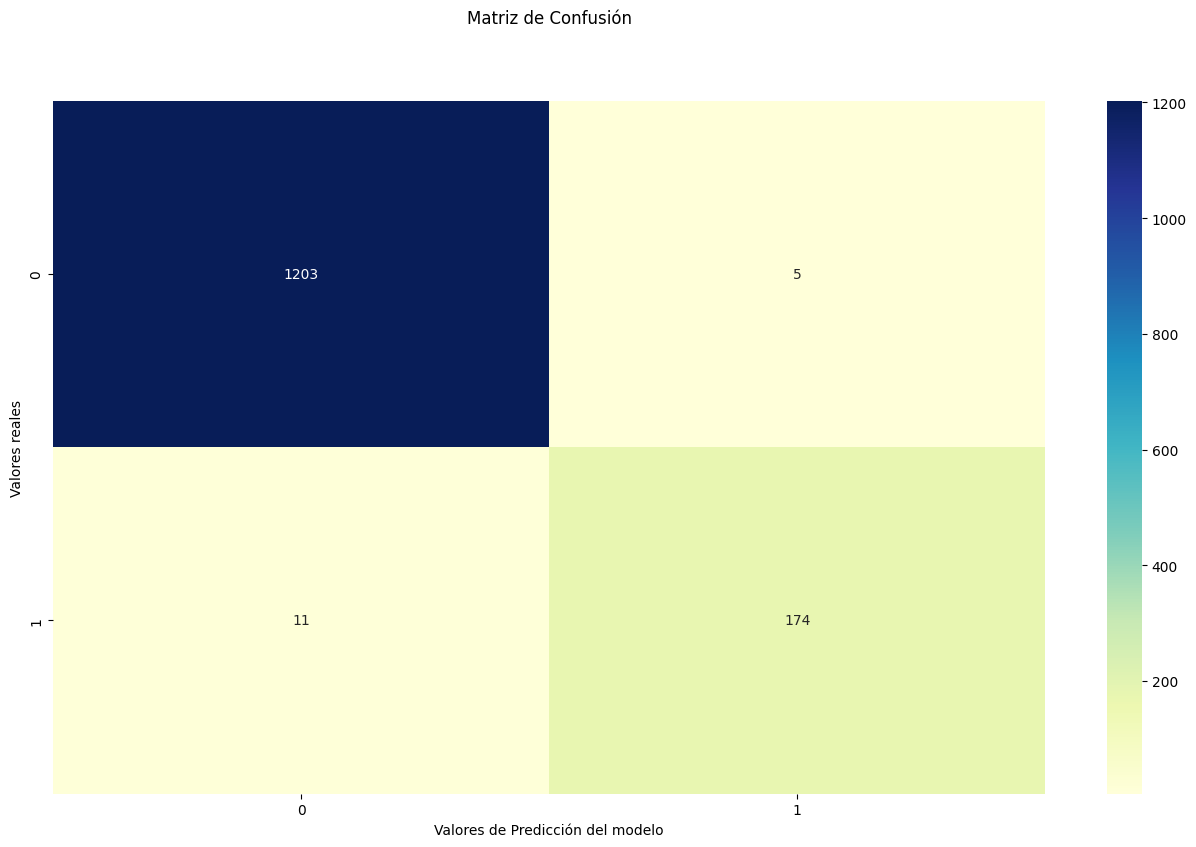

In [ ]:
MC2 = confusion_matrix(y_test, prediccion)              # se hace las predicciones en forma de matriz
p = sns.heatmap(pd.DataFrame(MC2),                      # se colocan en forma de dataframe
                annot=True,                             # para que tenga los valores adentro
                annot_kws = {'size':10 },                # para el tamaño de las etiquetas
                cmap="YlGnBu",                          # colores
                fmt = "g")                              # formato de los números.

plt.title("Matriz de Confusión", y=1.1)
plt.ylabel("Valores reales")
plt.xlabel("Valores de Predicción del modelo")

Podemos imprimir el resumen de estas métricas

In [ ]:
print(classification_report(y_test,prediccion))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1208
           1       0.97      0.94      0.96       185

    accuracy                           0.99      1393
   macro avg       0.98      0.97      0.97      1393
weighted avg       0.99      0.99      0.99      1393



## <FONT SIZE=4 COLOR="bronw"> ¿Qué puede concluir?</FONT>

**Respuesta:**

In [ ]:
!pip install pycaret # Caret also is for R

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 57.1 MB/s eta 0:0

In [ ]:
from pycaret.classification import *

setup(
    data=data,
    target='charges',
    train_size=0.8,
    session_id=10,
    normalize=True,
    transform_target=True
)